# Achievement 4, Task 9

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 

In [2]:
#Path to instacart basket analysis 
path = r'/Users/libertyonia/Documents/Instacart Basket Analysis'

In [3]:
#import pickle file from Part 1 as a dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_4-9.pkl'))

In [4]:
#check the columns in the ords_prods_cust dataframe 
ords_prods_cust.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spending',
 'spending_flag',
 'median_dspo',
 'order_behavior',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 '_merge']

# Question 2 
If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: >

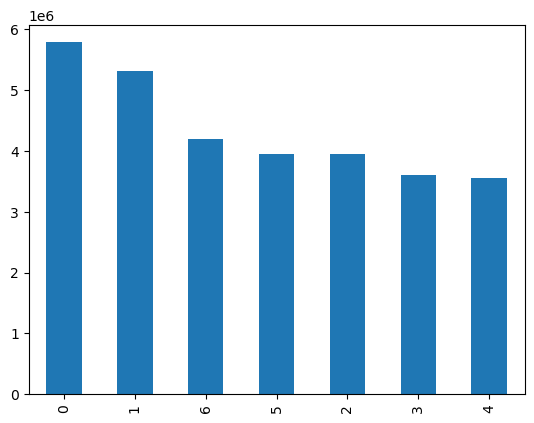

In [5]:
#Create a bar chart of order_day_of_week column 
ords_prods_cust['order_day_of_week'].value_counts().plot.bar()


Text(0.5, 0, 'Prices')

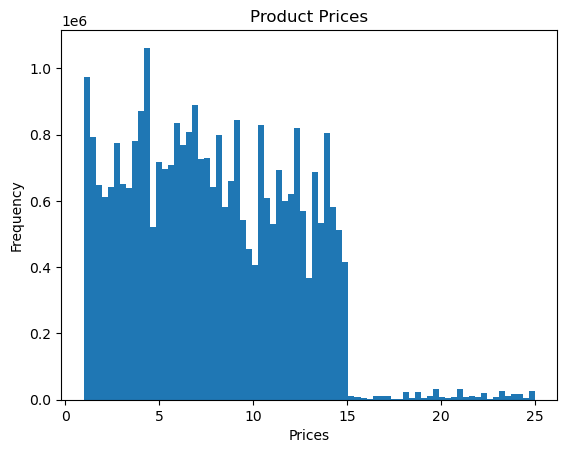

In [6]:
#Create a histogram of prices column
hist = ords_prods_cust['prices'].plot.hist(bins = 75)
hist.set_title('Product Prices')
hist.set_xlabel('Prices')

In [24]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices.png'))

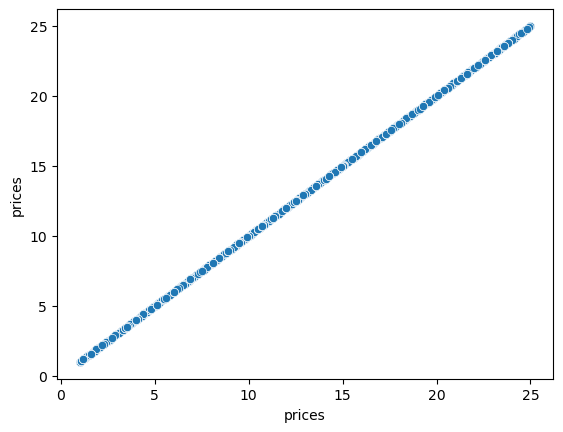

In [7]:
#Create a scatterplot of the prices column
prices_scatter = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

In [8]:
#Create a subset of the first 1,000,000 rows 
subset_ords_prods_cust = ords_prods_cust[:1000000]

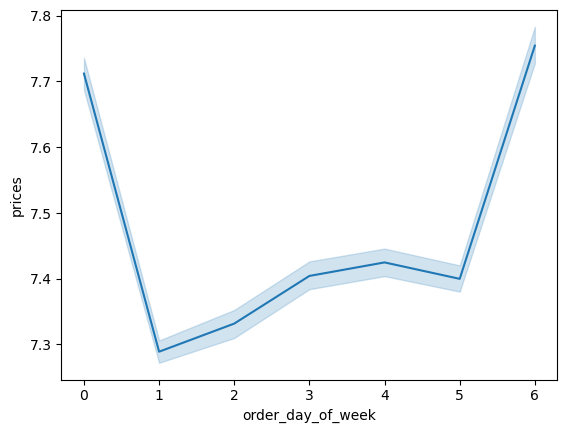

In [9]:
#Create a line chart of the subset_ords_prods_cust dataframe 
subset_line = sns.lineplot(data = subset_ords_prods_cust, x= 'order_day_of_week', y = 'prices')

# Question 3 
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0.5, 1.0, 'Orders by Hour of Day')

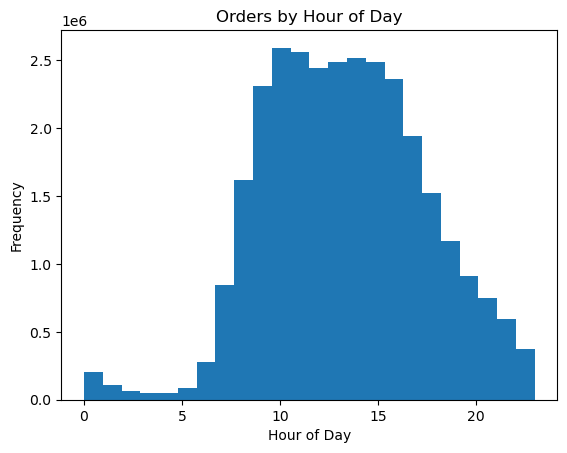

In [10]:
#Histogram of order_hour_of_day column 
ords_hour_of_day_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel('Hour of Day')
plt.title('Orders by Hour of Day')

#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.
The frequency of orders are greater between between 10 am - 5 pm. This means most orders are happening during the morning and afternoon. This makes sense, because most people are sleeping before 7 am and after 11  pm. 

# Question 4 
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0.5, 1.0, 'Customer Loyalty')

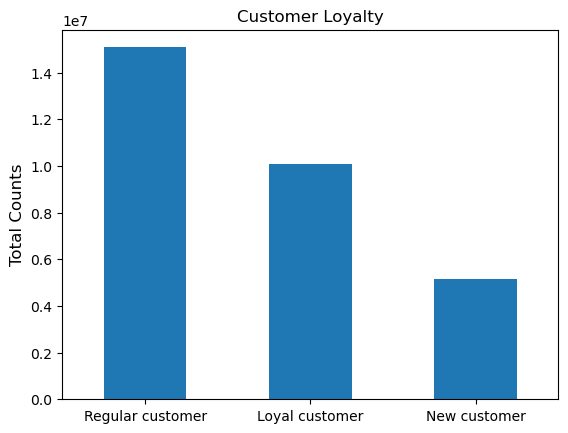

In [11]:
#create a bar chart of the loyalty_flag column 
loyality_flag_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
plt.ylabel('Total Counts', fontsize = 12)
plt.xticks(rotation='horizontal')
plt.title('Customer Loyalty')

### Answer 4 
There are more regular customers than loyal customers and new customers. 

# Question 5 
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [12]:
#create a sample of the ords_prods_cust dataframe 
np.random.seed(4)
sample = np.random.rand(len(ords_prods_cust)) <= 0.7

In [13]:
#store the 70% of dataframe in big and 30% in small 
big = ords_prods_cust[sample]
small = ords_prods_cust[~sample]

Text(0.5, 1.0, 'Prices by Hour of Day')

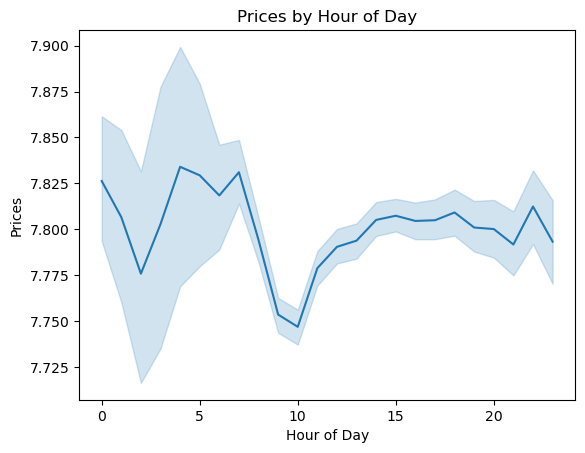

In [14]:
#select the prices and order_hour_of_day column 
prices_line = sns.lineplot(data = small, x = 'order_hour_of_day', y ='prices')
prices_line.set_xlabel('Hour of Day')
prices_line.set_ylabel('Prices')
prices_line.set_title('Prices by Hour of Day')

# Question 6
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0, 0.5, 'Number of Dependants')

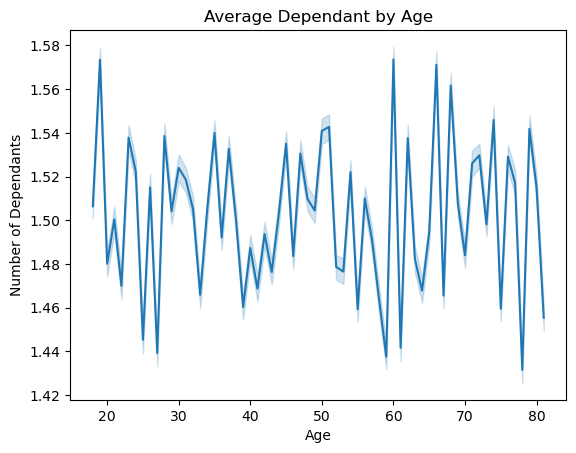

In [15]:
#create a line chart of the small sample 
#look at the age and dependent columns 
line_age_dependents = sns.lineplot(data = small, x = 'Age', y = 'n_dependants')
plt.title('Average Dependant by Age')
line_age_dependents.set_ylabel('Number of Dependants')

### Describe what the line chart shows 
The line chart shows the average dependants by age. If I groupby Age and take the average of n_dependants, then I will see similar results to the the line chart (see below). 

The line chart shows the average n_dependants is similar across all age groups(between 1.4 - 1.6) 

In [16]:
#Average n_dependants by age
small.groupby('Age').agg({'n_dependants' : ['mean']})

,n_dependants
,mean
Age,
18,1.506378
19,1.573382
20,1.480113
21,1.500379
22,1.469985
...,...
77,1.517046
78,1.431615


# Question 7 
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0.5, 1.0, 'Age vs Income')

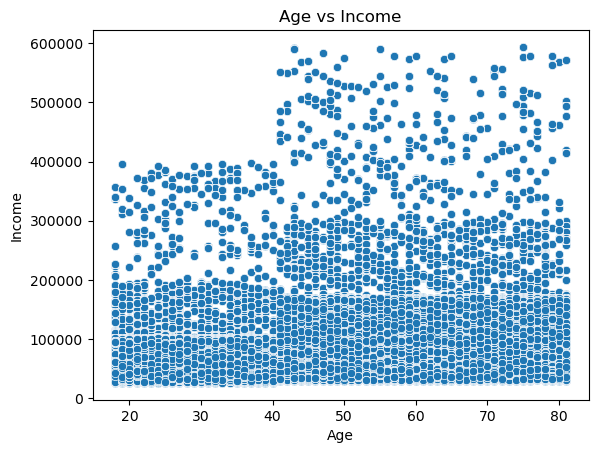

In [17]:
#scatter plot between age and income 
age_income_scatter = sns.scatterplot(x = 'Age', y = 'income', data = small)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.
The scatterplot shows there is a weak correlation between age and income. There are high earners making over $400,000 annual from age 40 - 80. Customers younger than 40 generally make less than customers who are older.

In [18]:
small.groupby('Age').agg({'income' :['mean']})

,income
,mean
Age,
18,70583.926227
19,69813.668212
20,70918.469392
21,70554.843018
22,69935.655087
...,...
77,116735.071800
78,117267.861875


# Question 8 
Export your visualizations as “.png” files in your relevant project folder.

In [19]:
#export ords_hour_of_day_hist histogram
ords_hour_of_day_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_hour_of_day_hist.png'))

In [20]:
#export loyality_flag_bar bar chart 
loyality_flag_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyality_flag_bar.png'))

In [21]:
# export prices_line line 
prices_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_hourOfDay.png'))

In [22]:
#export line_age_dependents line chart 
line_age_dependents.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_dependents.png'))

In [23]:
#export age_income_scatter scatterplot 
age_income_scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_scatter.png'))

# Question 9 
Save your notebook from part 2 of this Exercise’s task.